In [1]:
import seaborn as sns

In [2]:
# import datasets
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')

## Categorical Plots

### Categorical Scatter Plot

- Stripplot
- Swarmplot

### Categorical Distribution Plots

- Boxplot
- Violinplot

### Categorical Estimate Plot -> for central tendency

- Barplot
- Pointplot
- Countplot

### Figure level function -> `catplot`

<Axes: xlabel='day', ylabel='total_bill'>

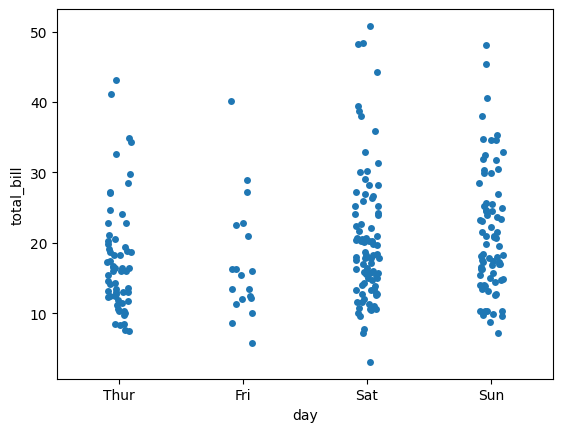

In [4]:
# strip plot -> axes level function
sns.stripplot(data=tips,x='day',y='total_bill')

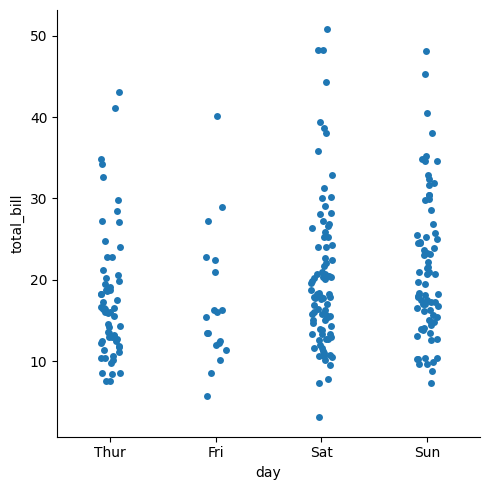

In [5]:
# catplot -> figure level function
sns.catplot(data=tips,x='day',y='total_bill',kind='strip')

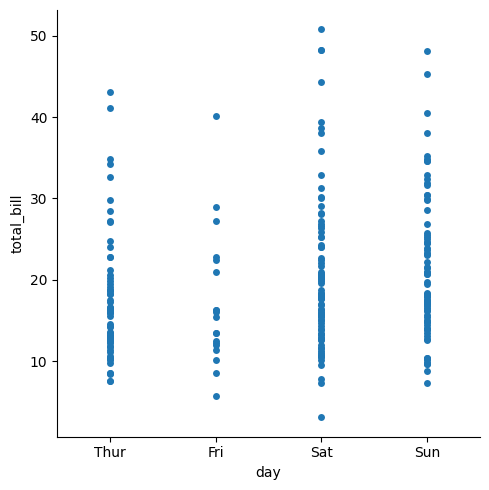

In [6]:
# jitter
sns.catplot(data=tips,x='day',y='total_bill',kind='strip',jitter=False)

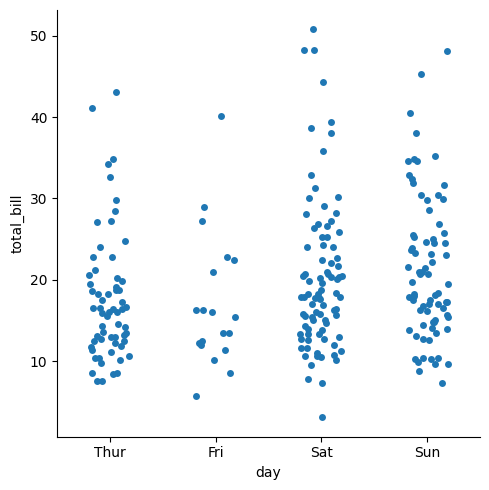

In [9]:
sns.catplot(data=tips,x='day',y='total_bill',kind='strip',jitter=0.2)

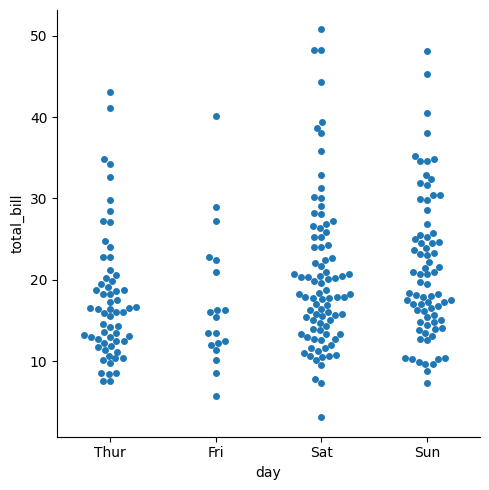

In [10]:
# swarmplot
sns.catplot(data=tips,x='day',y='total_bill',kind='swarm')

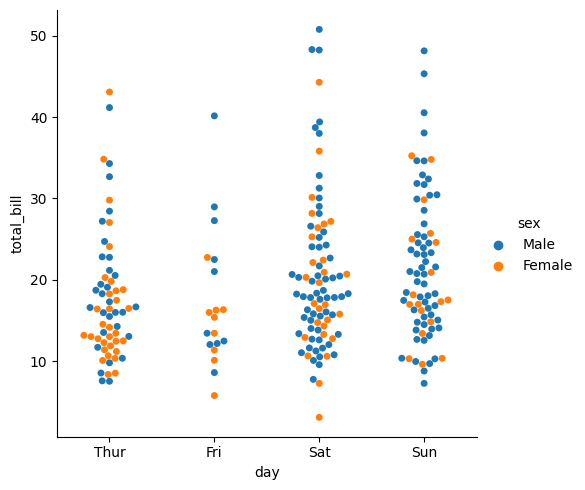

In [11]:
# hue
sns.catplot(data=tips,x='day',y='total_bill',kind='swarm',hue='sex')

### Boxplot

A boxplot is a standardized way of displaying the distribution of data based on a five number summary (“minimum”, first quartile [Q1], median, third quartile [Q3] and “maximum”). It can tell you about your outliers and what their values are. Boxplots can also tell you if your data is symmetrical, how tightly your data is grouped and if and how your data is skewed.

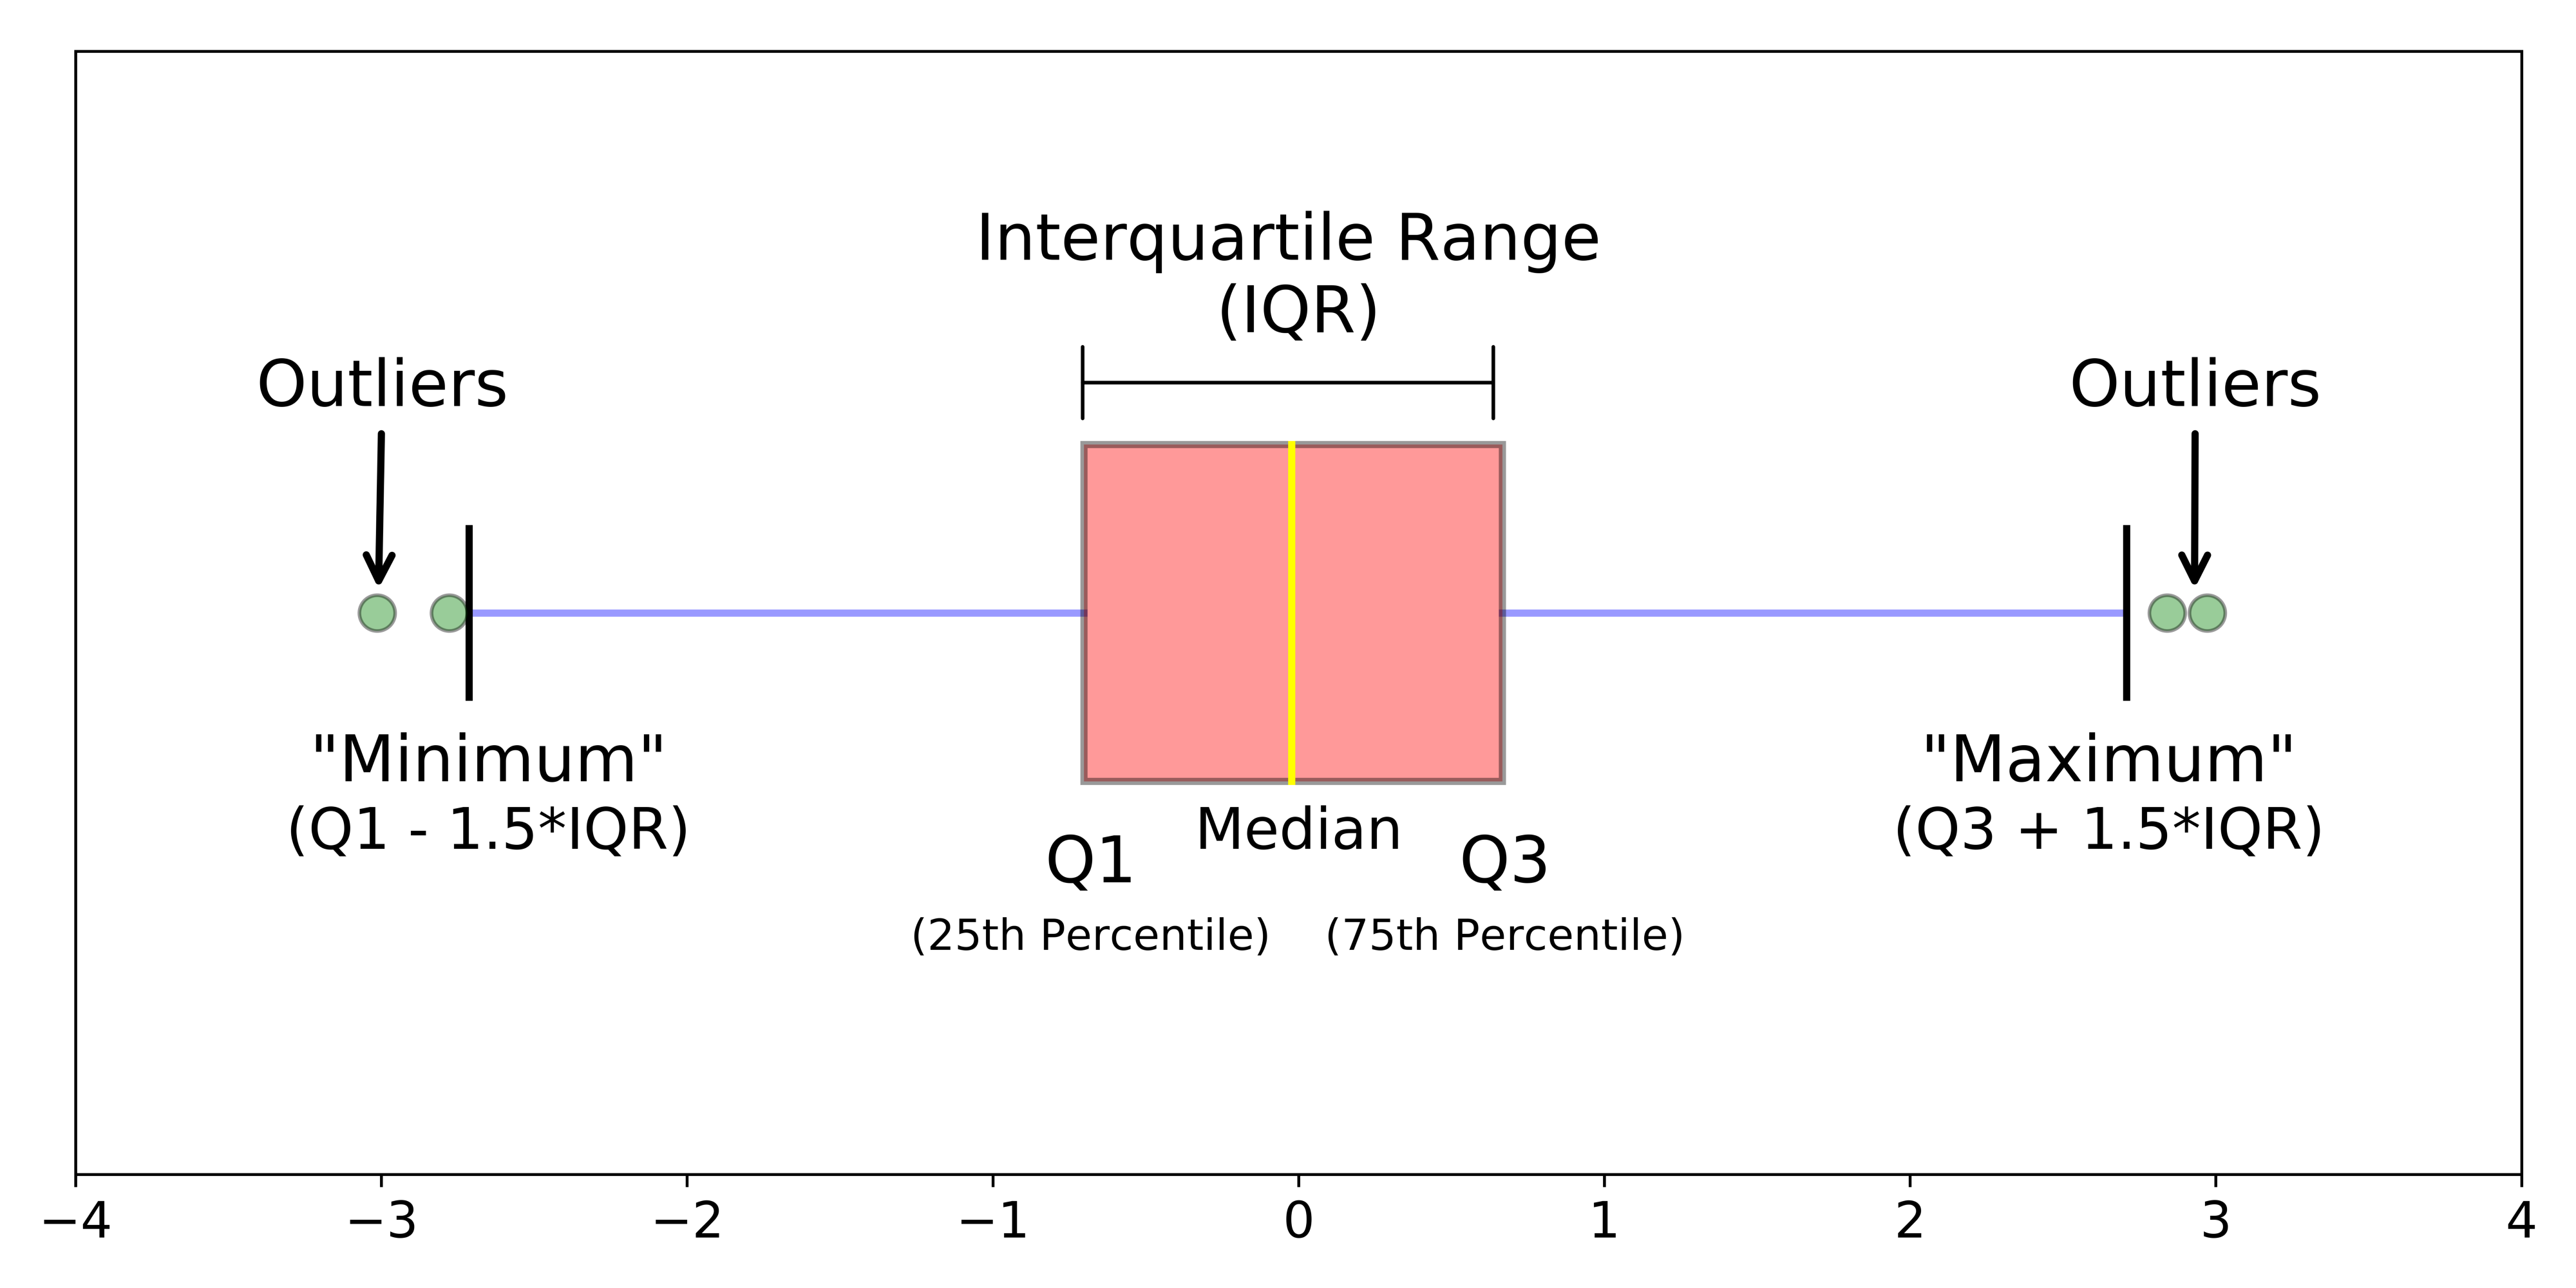

<Axes: xlabel='day', ylabel='total_bill'>

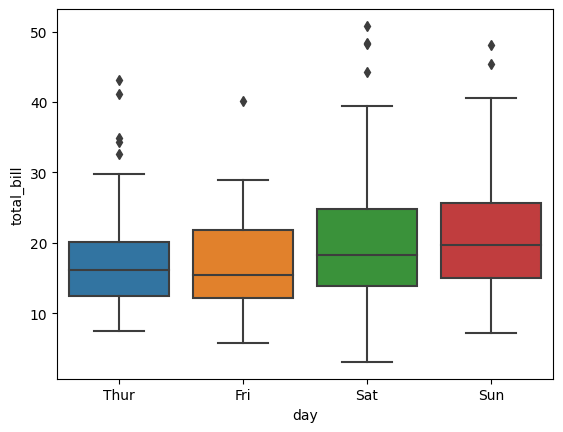

In [13]:
# Box plot
sns.boxplot(data=tips,x='day',y='total_bill')

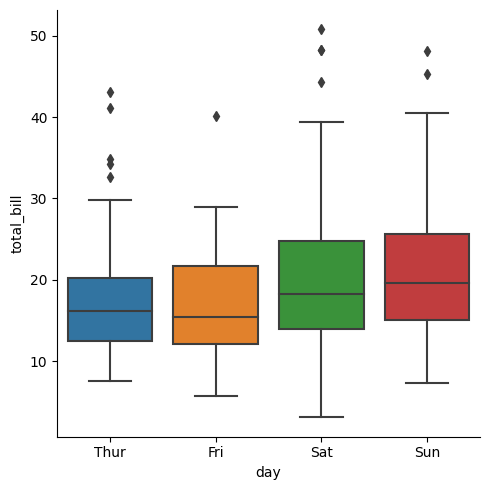

In [14]:
# using catplot
sns.catplot(data=tips,x='day',y='total_bill',kind='box')

<Axes: ylabel='total_bill'>

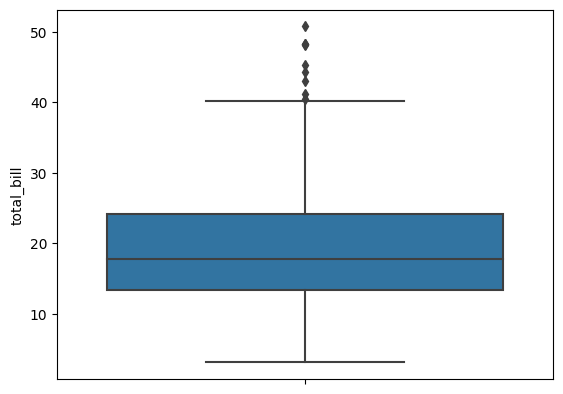

In [15]:
# single boxplot -> numerical col
sns.boxplot(data=tips,y='total_bill')

### Violinplot = (Boxplot + KDEplot)

<Axes: xlabel='day', ylabel='total_bill'>

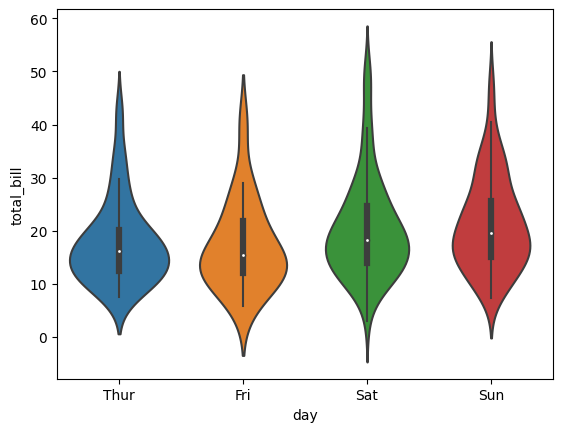

In [16]:
# violinplot
sns.violinplot(data=tips,x='day',y='total_bill')

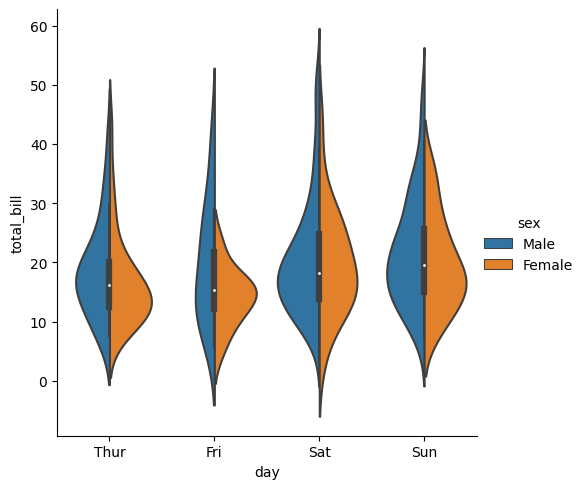

In [17]:
# hue
sns.catplot(data=tips,x='day',y='total_bill',kind='violin',hue='sex',split=True)

<Axes: xlabel='sex', ylabel='total_bill'>

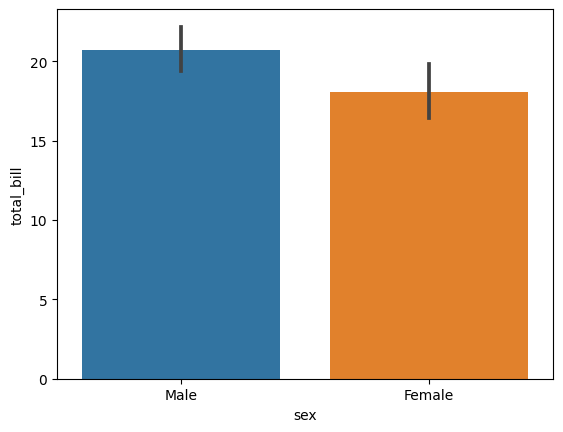

In [25]:
# barplot
# some issue with errorbar
sns.barplot(data=tips,x='sex',y='total_bill',errorbar=("ci",95))

When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars

<Axes: xlabel='sex', ylabel='count'>

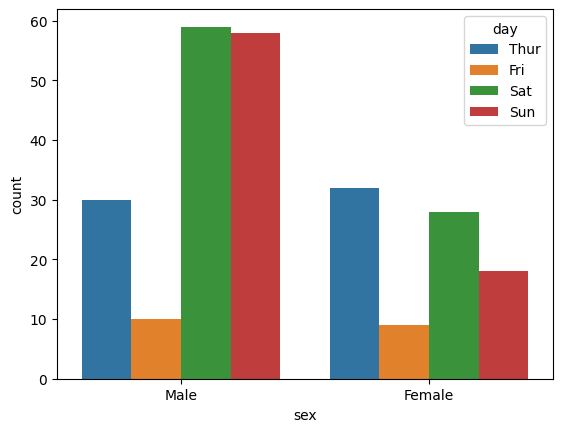

In [26]:
# countplot
sns.countplot(data=tips,x='sex',hue='day')

A special case for the bar plot is when you want to show the number of observations in each category rather than computing a statistic for a second variable. This is similar to a histogram over a categorical, rather than quantitative, variable

<Axes: xlabel='sex', ylabel='total_bill'>

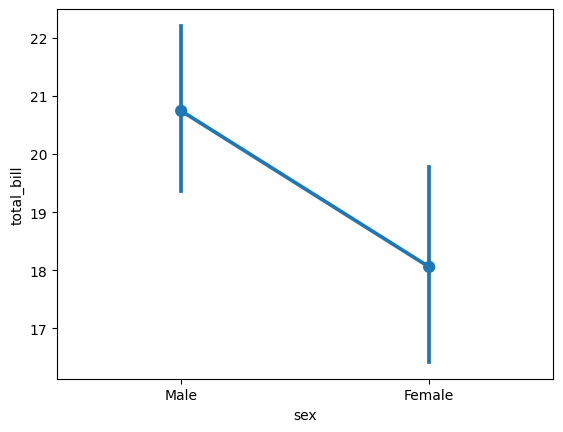

In [27]:
# pointplot
sns.pointplot(data=tips,x='sex',y='total_bill')

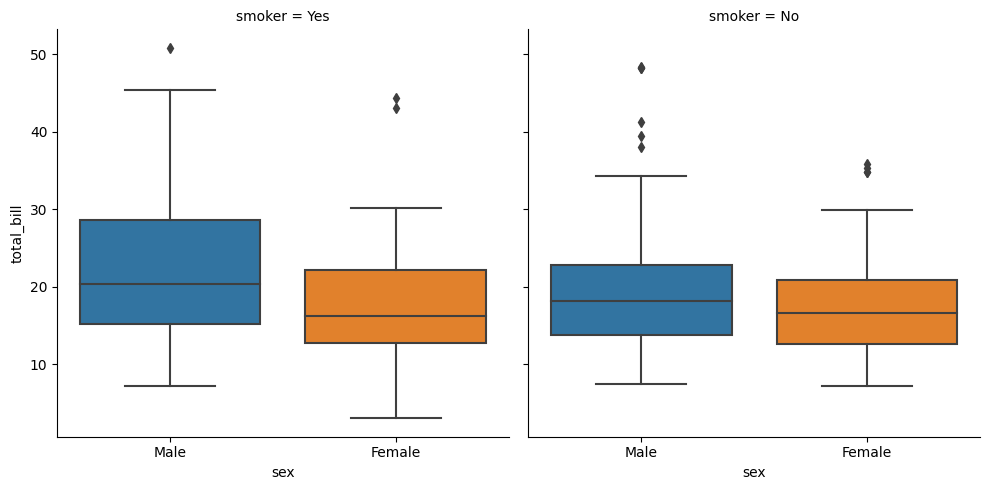

In [29]:
# faceting using countplot
sns.catplot(data=tips,x='sex',y='total_bill',col='smoker',kind='box')

### Regression Plots

- regplot
- lmplot

In the simplest invocation, both functions draw a scatterplot of two variables, x and y, and then fit the regression model y ~ x and plot the resulting regression line and a 95% confidence interval for that regression.

<Axes: xlabel='total_bill', ylabel='tip'>

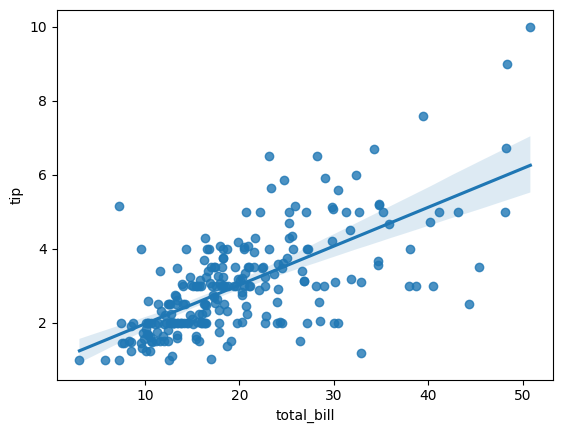

In [30]:
# regplot -> axes level function
# hue parameter not available
sns.regplot(data=tips,x='total_bill',y='tip')

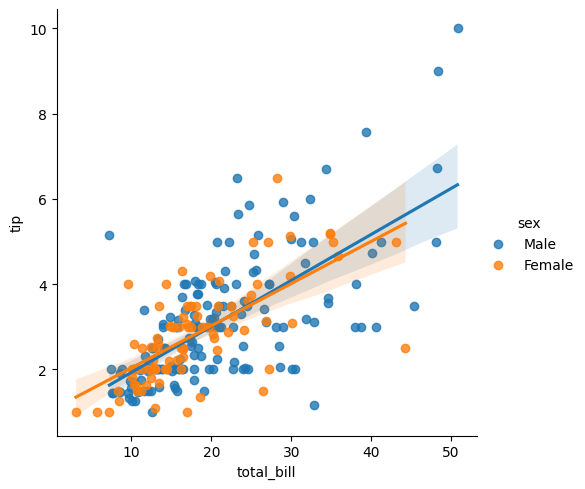

In [31]:
# Lmplot -> figure level function
sns.lmplot(data=tips,x='total_bill',y='tip',hue='sex')

<Axes: xlabel='total_bill', ylabel='tip'>

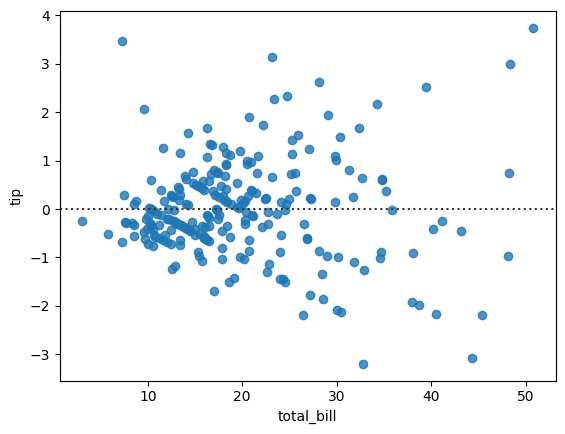

In [33]:
# residplot
sns.residplot(data=tips,x='total_bill',y='tip')

### A second way to plot Facet plots -> FacetGrid

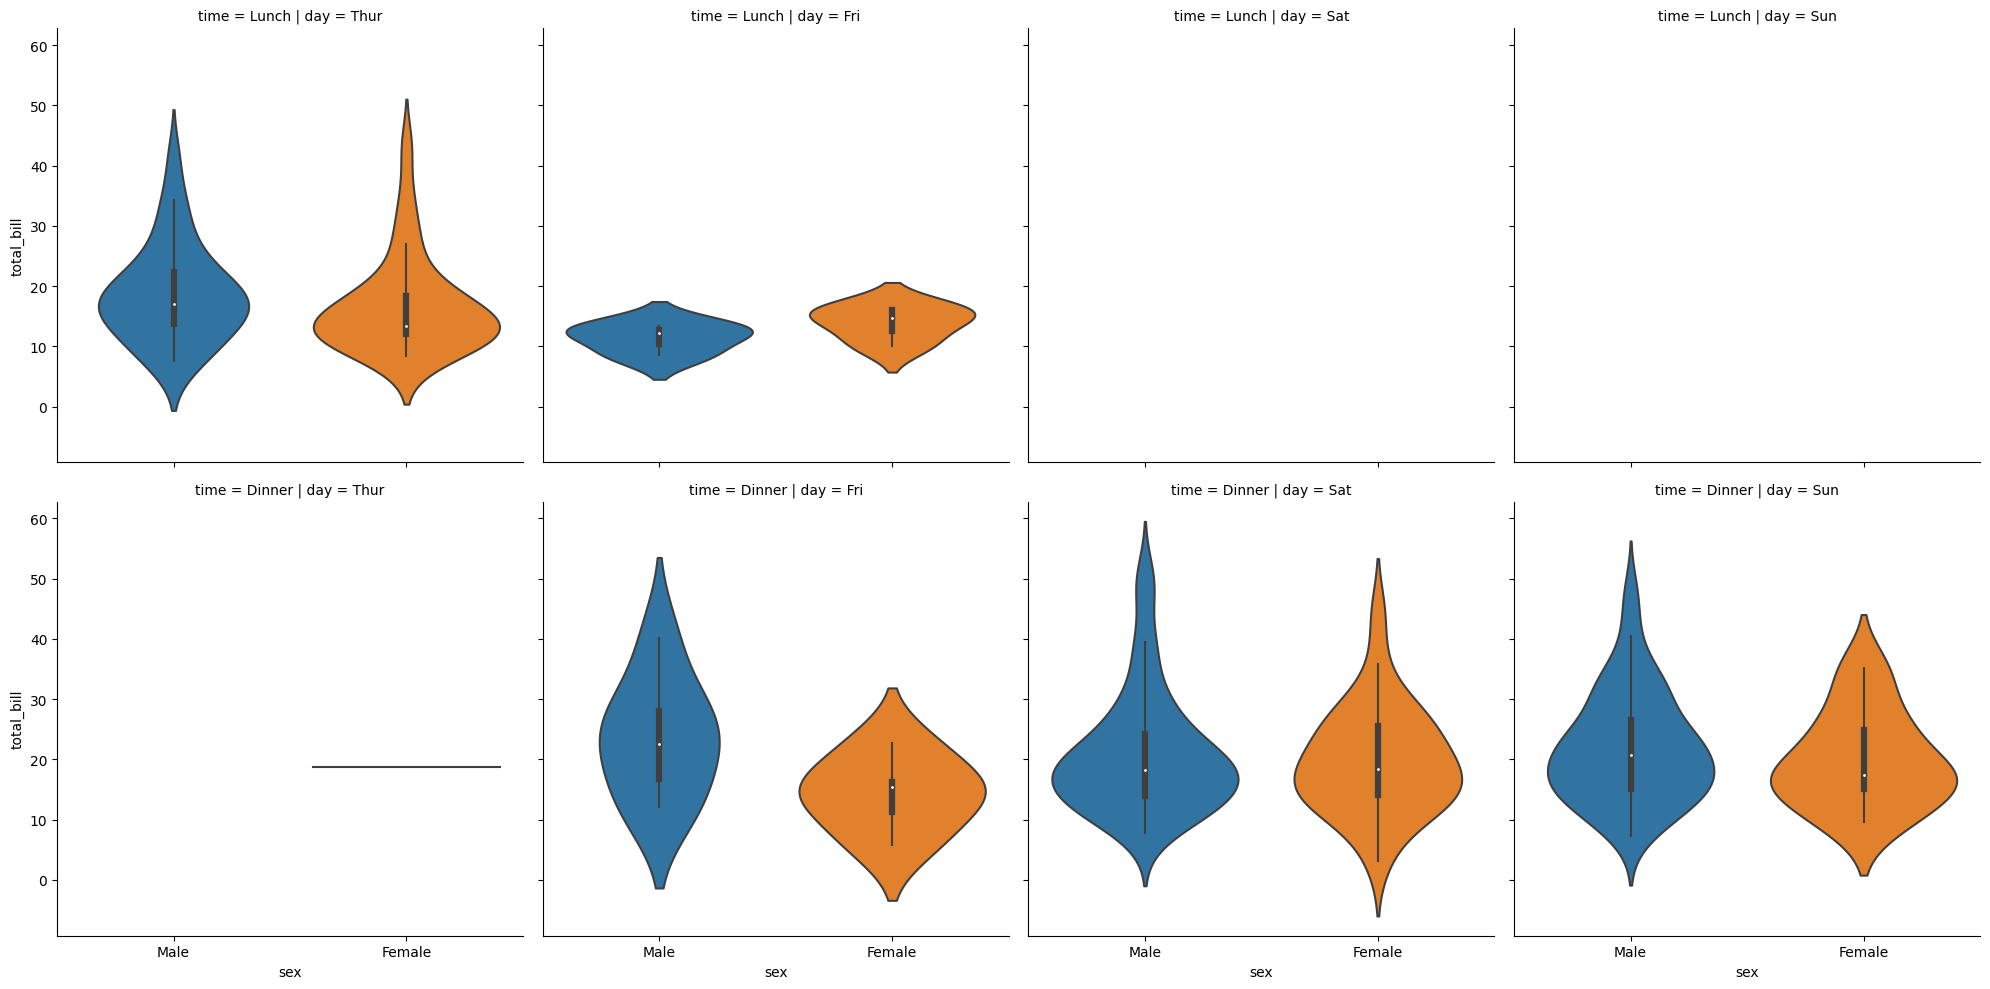

In [34]:
# figure level -> relplot -> displot -> catplot -> lmplot
sns.catplot(data=tips,x='sex',y='total_bill',kind='violin',col='day',row='time')

c:\Users\naman\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


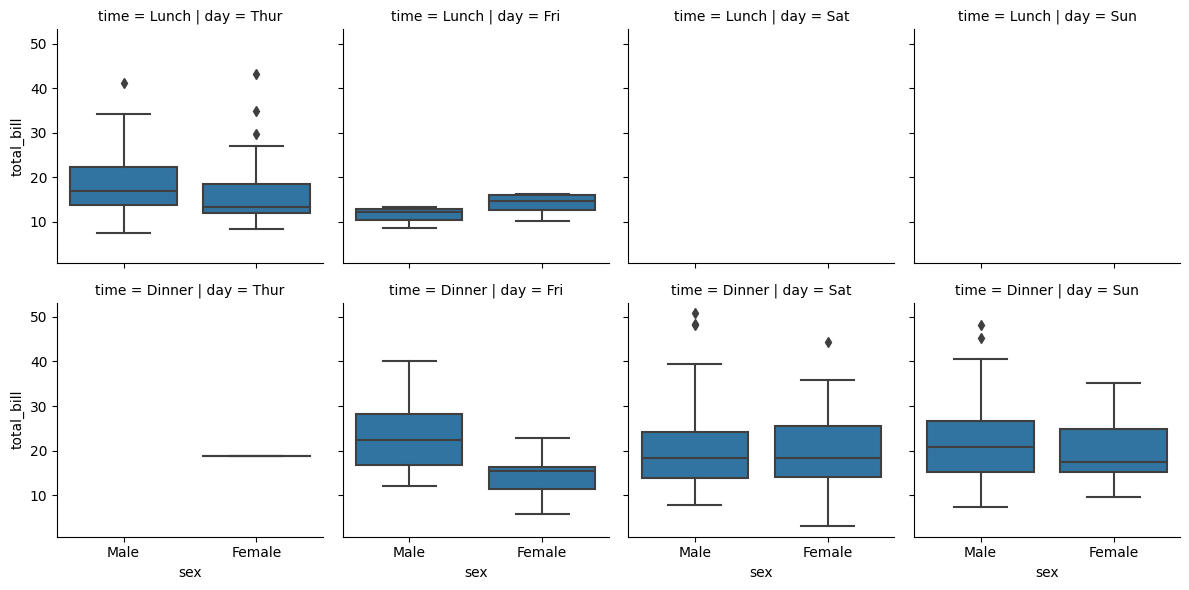

In [43]:
g = sns.FacetGrid(data=tips,col='day',row='time')

# g.map(sns.violinplot,'sex','total_bill')
g.map(sns.boxplot,'sex','total_bill')

### Plotting Pairwise Relationship (PairGrid Vs Pairplot)

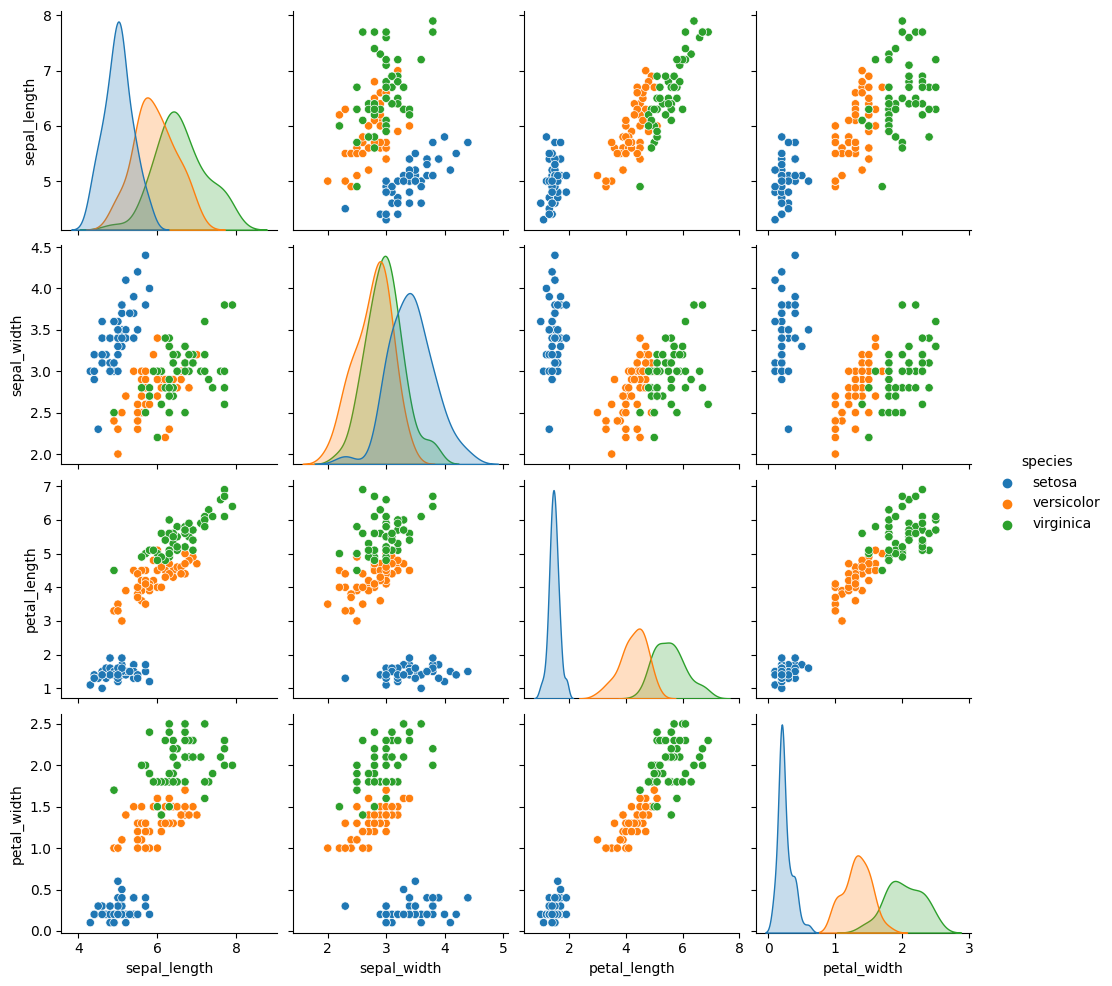

In [46]:
sns.pairplot(iris,hue='species')

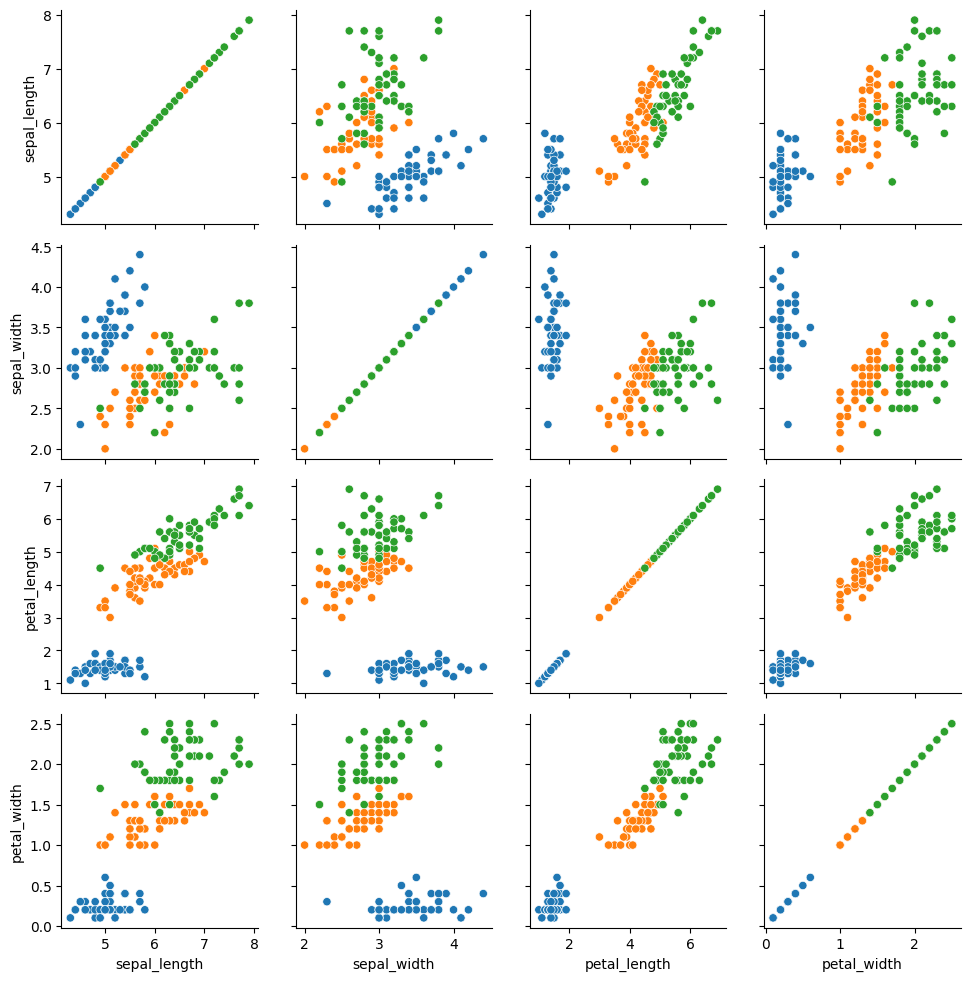

In [48]:
# pair grid
g = sns.PairGrid(data=iris,hue='species')
# g.map
g.map(sns.scatterplot)

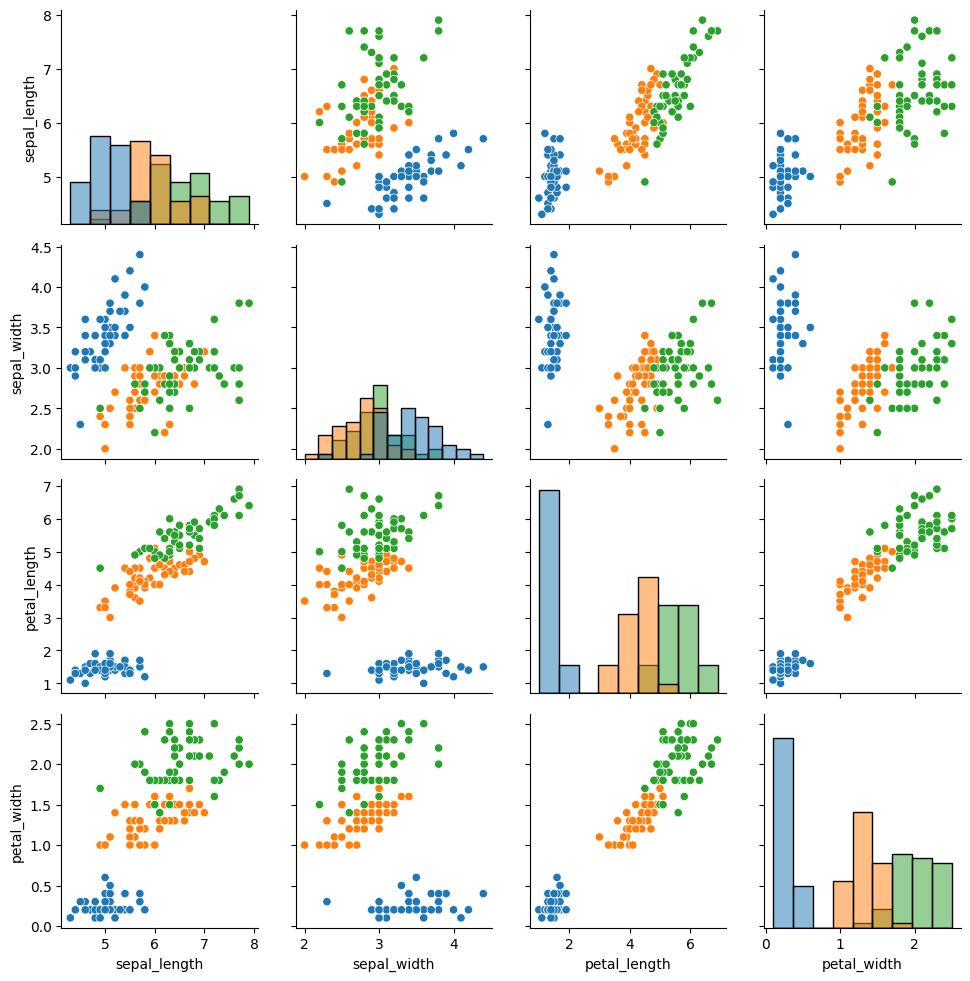

In [49]:
# map_diag -> map_offdiag
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

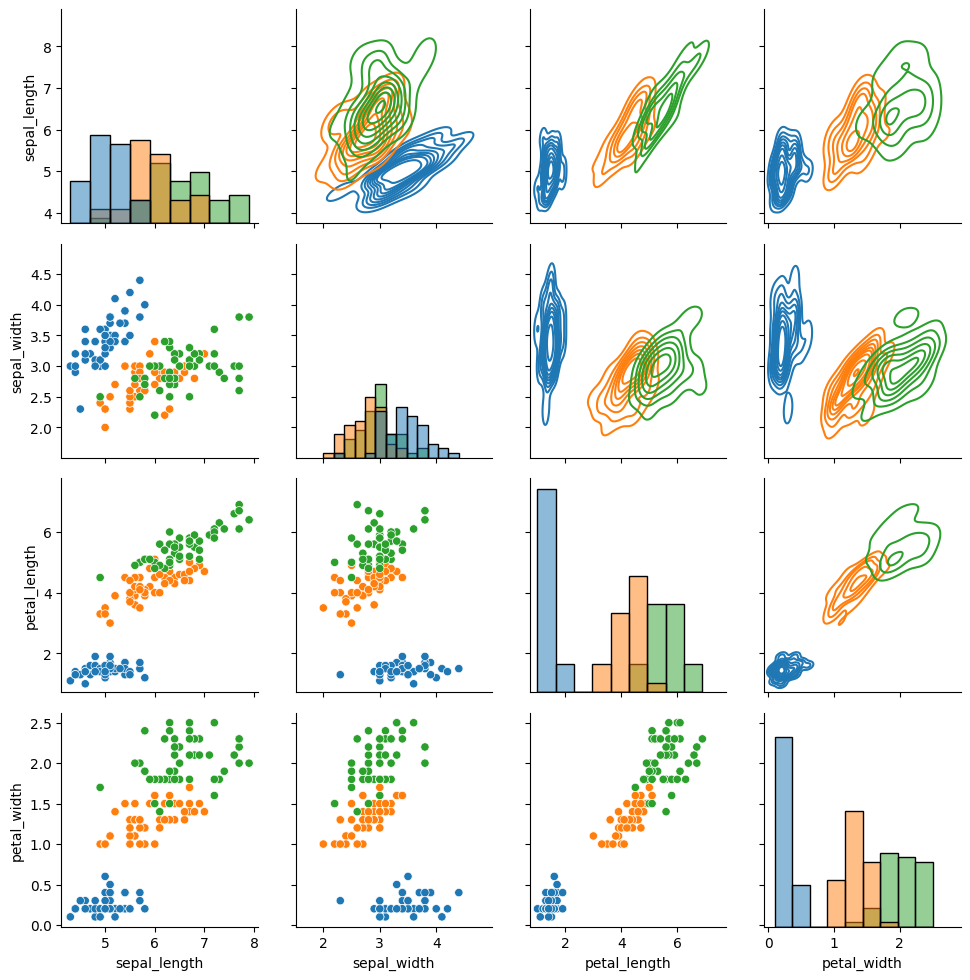

In [50]:
# map_diag -> map_upper -> map_lower
g = sns.PairGrid(data=iris,hue='species')
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

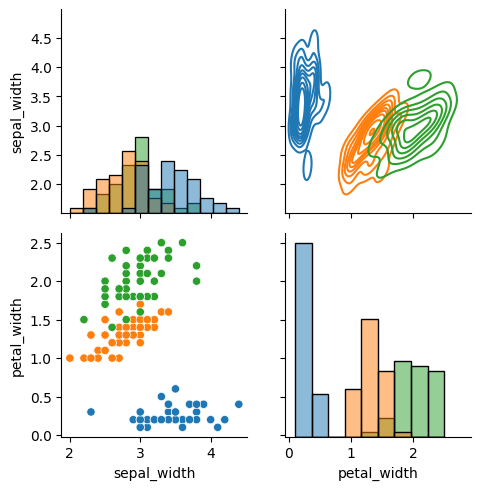

In [51]:
# vars
g = sns.PairGrid(data=iris,hue='species',vars=['sepal_width','petal_width'])
g.map_diag(sns.histplot)
g.map_upper(sns.kdeplot)
g.map_lower(sns.scatterplot)

### JointGrid Vs Jointplot

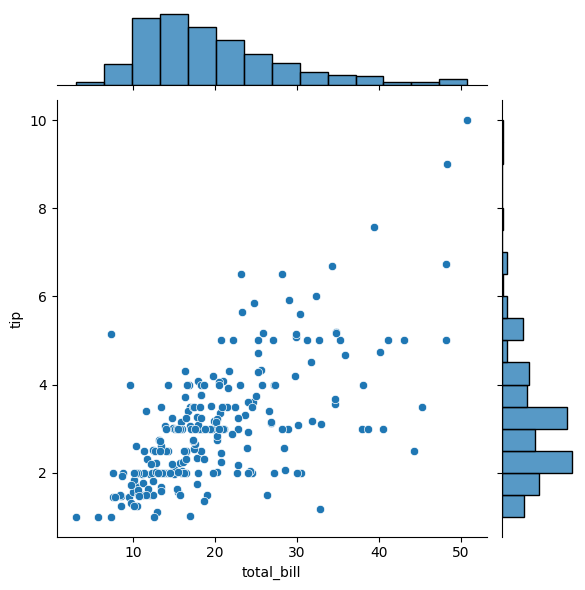

In [53]:
sns.jointplot(data=tips,x='total_bill',y='tip')

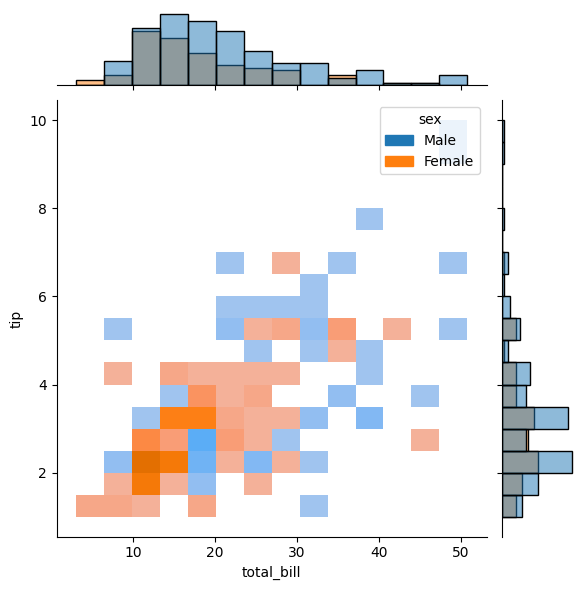

In [56]:
sns.jointplot(data=tips,x='total_bill',y='tip',kind='hist',hue='sex')

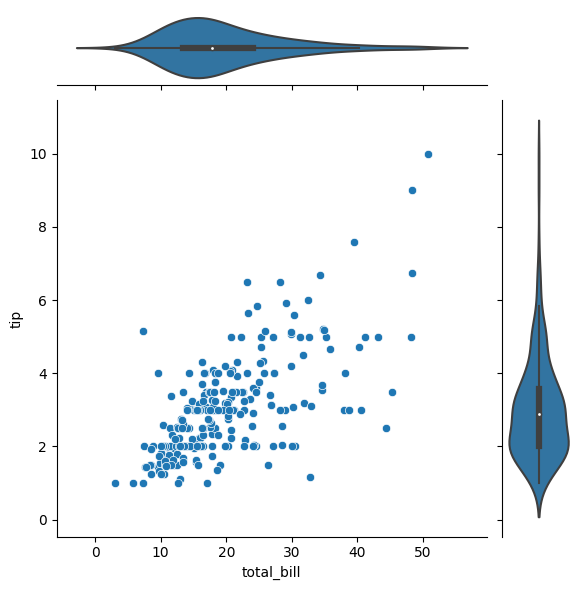

In [61]:
g = sns.JointGrid(data=tips,x='total_bill',y='tip')
g.plot(sns.scatterplot,sns.violinplot)